In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.generate_field import *
result_dir = '/home/zyou6474/tasks/channel_flow'
nk = 1

ModuleNotFoundError: No module named 'utils'

In [2]:
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]
x_coords, y_coords, z_coords = xyz(domain, dims)
dx = x_coords[1]- x_coords[0]
# Z-index of where the source is located at
z_ind = np.argmin(abs(z_coords-0.5))
print(z_ind)

43


In [3]:
x_coords, y_coords, z_coords = XYZ(domain, [dims[0]+1, dims[1]+1, dims[2]+1])
xc, yc, zc = XYZ_center(domain, dims)

Shape of xx: (129, 129, 65)
Shape of xx: (128, 128, 64)


In [4]:
# recent result
recent_dir = result_dir + r'/outputs'

dir = recent_dir
t_ind = 150
t_total = 5000
timestep = np.linspace(0, t_total, 51)


In [5]:
# filename of different varaibles
theta_f = dir + r'/theta.%.2i.%.8i'
velocity_f = dir + r'/baseflow/u_base.%.8i'

u = read_array_from_file(velocity_f %  t_ind, dims)
theta = read_array_from_file(theta_f % (nk, t_ind), dims)

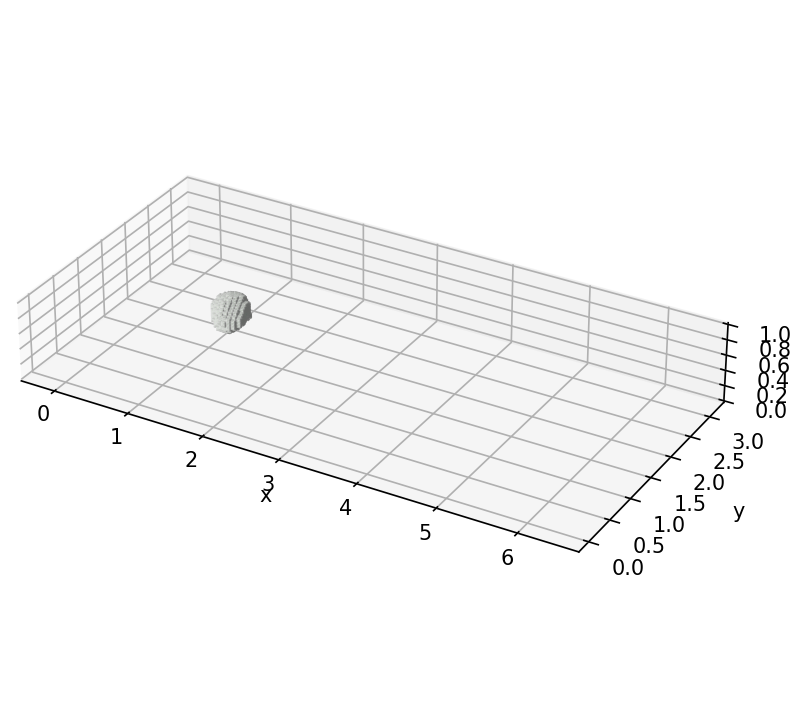

In [17]:
# define a sphere about [0.5, 0.5, 0.5]
sphere = theta > 0.1
# combine the color components
colors = cm.GnBu(theta, alpha=0.5)

# and plot everything
ax = plt.figure(figsize=(8, 6), dpi=150).add_subplot(projection='3d')
ax.voxels(x_coords, y_coords, z_coords, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.set_aspect('equal')